# Import package

In [22]:
from skimage.io import imread, imshow

# Data

##ADE20K

In [23]:
train = open('/content/drive/MyDrive/DL/HW4/ADE20K_DL_course/train.txt').read().split('\n')
ADE20K_train = train

In [24]:
test = open('/content/drive/MyDrive/DL/HW4/ADE20K_DL_course/test.txt').read().split('\n')
ADE20K_test = test

In [25]:
val = open('/content/drive/MyDrive/DL/HW4/ADE20K_DL_course/val.txt').read().split('\n')
ADE20K_val = val

In [26]:
ADE20K_alldata = []
ADE20K_alldata.extend(ADE20K_train)
ADE20K_alldata.extend(ADE20K_test)
ADE20K_alldata.extend(ADE20K_val)
ADE20K_alldata = sorted(ADE20K_alldata)[3:]
ADE20K_alldata

['00000001',
 '00000002',
 '00000003',
 '00000004',
 '00000005',
 '00000006',
 '00000007',
 '00000008',
 '00000009',
 '00000010',
 '00000011',
 '00000012',
 '00000013',
 '00000014',
 '00000015',
 '00000016',
 '00000017',
 '00000018',
 '00000019',
 '00000020',
 '00000021',
 '00000022',
 '00000023',
 '00000024',
 '00000025',
 '00000026',
 '00000027',
 '00000028',
 '00000029',
 '00000030',
 '00000031',
 '00000032',
 '00000033',
 '00000034',
 '00000035',
 '00000036',
 '00000037',
 '00000038',
 '00000039',
 '00000040',
 '00000041',
 '00000042',
 '00000043',
 '00000044',
 '00000045',
 '00000046',
 '00000047',
 '00000048',
 '00000049',
 '00000050',
 '00000051',
 '00000052',
 '00000053',
 '00000054',
 '00000055',
 '00000056',
 '00000057',
 '00000058',
 '00000059',
 '00000060',
 '00000061',
 '00000062',
 '00000063',
 '00000064',
 '00000065',
 '00000066',
 '00000067',
 '00000068',
 '00000069',
 '00000070',
 '00000071',
 '00000072',
 '00000073',
 '00000074',
 '00000075',
 '00000076',
 '00000077',

##VOCdevkit

In [27]:
train = open('/content/drive/MyDrive/DL/HW4/VOCdevkit/train.txt').read().split('\n')
VOC_train = train

In [28]:
test = open('/content/drive/MyDrive/DL/HW4/VOCdevkit/test.txt').read().split('\n')
VOC_test = test

In [29]:
val = open('/content/drive/MyDrive/DL/HW4/VOCdevkit/val.txt').read().split('\n')
VOC_val = val

In [30]:
VOC_alldata = []
VOC_alldata.extend(VOC_train)
VOC_alldata.extend(VOC_test)
VOC_alldata.extend(VOC_val)
VOC_alldata = sorted(VOC_alldata)[3:]
VOC_alldata

['000001',
 '000002',
 '000003',
 '000004',
 '000005',
 '000006',
 '000007',
 '000008',
 '000009',
 '000010',
 '000011',
 '000012',
 '000013',
 '000014',
 '000015',
 '000016',
 '000017',
 '000018',
 '000019',
 '000020',
 '000021',
 '000022',
 '000023',
 '000024',
 '000025',
 '000026',
 '000027',
 '000028',
 '000029',
 '000030',
 '000031',
 '000032',
 '000033',
 '000034',
 '000035',
 '000036',
 '000037',
 '000038',
 '000039',
 '000040',
 '000041',
 '000042',
 '000043',
 '000044',
 '000045',
 '000046',
 '000047',
 '000048',
 '000049',
 '000050',
 '000051',
 '000052',
 '000053',
 '000054',
 '000055',
 '000056',
 '000057',
 '000058',
 '000059',
 '000060',
 '000061',
 '000062',
 '000063',
 '000064',
 '000065',
 '000066',
 '000067',
 '000068',
 '000069',
 '000070',
 '000071',
 '000072',
 '000073',
 '000074',
 '000075',
 '000076',
 '000077',
 '000078',
 '000079',
 '000080',
 '000081',
 '000082',
 '000083',
 '000084',
 '000085',
 '000086',
 '000087',
 '000088',
 '000089',
 '000090',
 '000091',

# Semantic Segmentation

In [31]:
import IPython.display
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle as pkl


In [32]:
from PIL import Image
import matplotlib._color_data as mcd
import cv2
#import ipdb
import json
import numpy as np
import os

_NUMERALS = '0123456789abcdefABCDEF'
_HEXDEC = {v: int(v, 16) for v in (x+y for x in _NUMERALS for y in _NUMERALS)}
LOWERCASE, UPPERCASE = 'x', 'X'
def rgb(triplet):
    return _HEXDEC[triplet[0:2]], _HEXDEC[triplet[2:4]], _HEXDEC[triplet[4:6]]

def loadAde20K(file):
    fileseg = "/content/drive/MyDrive/DL/HW4/ADE20K_DL_course/masks/" + file.replace('.jpg', '_seg.png').split("/")[-1];
    with Image.open(fileseg) as io:
        seg = np.array(io);

    # Obtain the segmentation mask, bult from the RGB channels of the _seg file
    R = seg[:,:,0];
    G = seg[:,:,1];
    B = seg[:,:,2];
    ObjectClassMasks = (R/10).astype(np.int32)*256+(G.astype(np.int32));


    # Obtain the instance mask from the blue channel of the _seg file
    Minstances_hat = np.unique(B, return_inverse=True)[1]
    Minstances_hat = np.reshape(Minstances_hat, B.shape)
    ObjectInstanceMasks = Minstances_hat


    level = 0
    PartsClassMasks = [];
    PartsInstanceMasks = [];
    while True:
        level = level+1;
        file_parts = file.replace('.jpg', '_parts_{}.png'.format(level));
        if os.path.isfile(file_parts):
            with Image.open(file_parts) as io:
                partsseg = np.array(io);
            R = partsseg[:,:,0];
            G = partsseg[:,:,1];
            B = partsseg[:,:,2];
            PartsClassMasks.append((np.int32(R)/10)*256+np.int32(G));
            PartsInstanceMasks = PartsClassMasks
            # TODO:  correct partinstancemasks


        else:
            break

    objects = {}
    parts = {}

    attr_file_name = "/content/drive/MyDrive/DL/HW4/ADE20K_DL_course/jsons/" + file.replace('.jpg', '.json').split("/")[-1];
    if os.path.isfile(attr_file_name):
        with open(attr_file_name, 'r') as f:
            input_info = json.load(f)

        contents = input_info['annotation']['object']
        instance = np.array([int(x['id']) for x in contents])
        names = [x['raw_name'] for x in contents]
        corrected_raw_name =  [x['name'] for x in contents]
        partlevel = np.array([int(x['parts']['part_level']) for x in contents])
        ispart = np.array([p>0 for p in partlevel])
        iscrop = np.array([int(x['crop']) for x in contents])
        listattributes = [x['attributes'] for x in contents]
        polygon = [x['polygon'] for x in contents]
        for p in polygon:
            p['x'] = np.array(p['x'])
            p['y'] = np.array(p['y'])

        objects['instancendx'] = instance[ispart == 0]
        objects['class'] = [names[x] for x in list(np.where(ispart == 0)[0])]
        objects['corrected_raw_name'] = [corrected_raw_name[x] for x in list(np.where(ispart == 0)[0])]
        objects['iscrop'] = iscrop[ispart == 0]
        objects['listattributes'] = [listattributes[x] for x in list(np.where(ispart == 0)[0])]
        objects['polygon'] = [polygon[x] for x in list(np.where(ispart == 0)[0])]


        parts['instancendx'] = instance[ispart == 1]
        parts['class'] = [names[x] for x in list(np.where(ispart == 1)[0])]
        parts['corrected_raw_name'] = [corrected_raw_name[x] for x in list(np.where(ispart == 1)[0])]
        parts['iscrop'] = iscrop[ispart == 1]
        parts['listattributes'] = [listattributes[x] for x in list(np.where(ispart == 1)[0])]
        parts['polygon'] = [polygon[x] for x in list(np.where(ispart == 1)[0])]

    return {'img_name': file, 'segm_name': fileseg,
            'class_mask': ObjectClassMasks, 'instance_mask': ObjectInstanceMasks,
            'partclass_mask': PartsClassMasks, 'part_instance_mask': PartsInstanceMasks,
            'objects': objects, 'parts': parts}

def plot_polygon(img_name, info, show_obj=True, show_parts=False):
    colors = mcd.CSS4_COLORS
    color_keys = list(colors.keys())
    all_objects = []
    all_poly = []
    if show_obj:
        all_objects += info['objects']['class']
        all_poly += info['objects']['polygon']
    if show_parts:
        all_objects += info['parts']['class']
        all_poly += info['objects']['polygon']

    img = cv2.imread(img_name)
    thickness = 5
    for it, (obj, poly) in enumerate(zip(all_objects, all_poly)):
        curr_color = colors[color_keys[it % len(color_keys)] ]
        pts = np.concatenate([poly['x'][:, None], poly['y'][:, None]], 1)[None, :]
        color = rgb(curr_color[1:])
        img = cv2.polylines(img, pts, True, color, thickness)
    return img

In [33]:
DATASET_PATH = '/content/drive/MyDrive/DL/HW4/ADE20K_DL_course'
index_file = 'index_ade20k.pkl'
with open('{}/{}'.format(DATASET_PATH, index_file), 'rb') as f:
    index_ade20k = pkl.load(f)

In [34]:
index_ade20k.keys()

dict_keys(['filename', 'folder', 'objectIsPart', 'objectPresence', 'objectcounts', 'objectnames', 'proportionClassIsPart', 'scene', 'wordnet_found', 'wordnet_level1', 'wordnet_synset', 'wordnet_hypernym', 'wordnet_gloss', 'wordnet_frequency', 'description'])

In [35]:
objectIsPart = []
for i in range(len(index_ade20k["objectIsPart"])):
  objectIsPart.append(index_ade20k["objectIsPart"][i][25258:27258])

objectIsPart = np.array(objectIsPart)


In [36]:
objectPresence = []
for i in range(len(index_ade20k["objectPresence"])):
  objectPresence.append(index_ade20k["objectPresence"][i][25258:27258])

objectPresence = np.array(objectPresence)

In [37]:
index = {}
index["filename"] = index_ade20k["filename"][25258:27258]
index["objectIsPart"] = objectIsPart
index["objectPresence"] = objectPresence
index["objectcounts"] = index_ade20k["objectcounts"]
index["objectnames"] = index_ade20k["objectnames"]
index["proportionClassIsPart"] = index_ade20k["proportionClassIsPart"]
index["scene"] = index_ade20k["scene"][25258:27258]
index["wordnet_found"] = index_ade20k["wordnet_found"]
index["wordnet_level1"] = index_ade20k["wordnet_level1"]
index["wordnet_synset"] = index_ade20k["wordnet_synset"]
index["wordnet_hypernym"] = index_ade20k["wordnet_hypernym"]
index["wordnet_gloss"] = index_ade20k["wordnet_gloss"]
index["wordnet_frequency"] = index_ade20k["wordnet_frequency"]
index["description"] =  index_ade20k["description"]

In [38]:
#print("File loaded, description of the attributes:")
#print('--------------------------------------------')
#for attribute_name, desc in index_ade20k['description'].items():
#    print('* {}: {}'.format(attribute_name, desc))
#print('--------------------------------------------\n')

i = 10 # 16899, 16964
nfiles = len(index['filename'])
file_name = index['filename'][i]
num_obj = index['objectPresence'][:, i].sum()
num_parts = index['objectIsPart'][:, i].sum()
count_obj = index['objectPresence'][:, i].max()
obj_id = np.where(index['objectPresence'][:, i] == count_obj)[0][0]
obj_name = index['objectnames'][obj_id]
full_file_name = '{}/{}'.format('imgs', index['filename'][i])
print("The dataset has {} images".format(nfiles))
print("The image at index {} is {}".format(i, file_name))
print("It is located at {}".format(full_file_name))
print("It happens in a {}".format(index['scene'][i]))
print("It has {} objects, of which {} are parts".format(num_obj, num_parts))
print("The most common object is object {} ({}), which appears {} times".format(obj_name, obj_id, count_obj))

The dataset has 2000 images
The image at index 10 is ADE_val_00000011.jpg
It is located at imgs/ADE_val_00000011.jpg
It happens in a /airport_terminal
It has 17 objects, of which 2 are parts
The most common object is object light, light source (1450), which appears 8 times


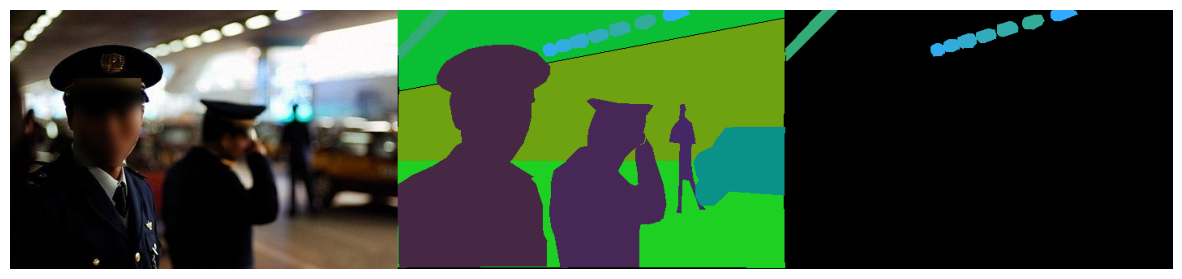

In [39]:
root_path = DATASET_PATH

# This function reads the image and mask files and generate instance and segmentation
# masks
info = loadAde20K('{}/{}'.format(root_path, full_file_name))
img = cv2.imread(info['img_name'])[:,:,::-1]
seg = cv2.imread(info['segm_name'])[:,:,::-1]
seg_mask = seg.copy()

# The 0 index in seg_mask corresponds to background (not annotated) pixels
seg_mask[info['class_mask'] != obj_id+1] *= 0
plt.figure(figsize=(15,5))

plt.imshow(np.concatenate([img, seg, seg_mask], 1))
plt.axis('off')
if len(info['partclass_mask']):
    plt.figure(figsize=(5*len(info['partclass_mask']), 5))
    plt.title('Parts')
    plt.imshow(np.concatenate(info['partclass_mask'],1))
    plt.axis('off')

(-0.5, 1433.5, 319.5, -0.5)

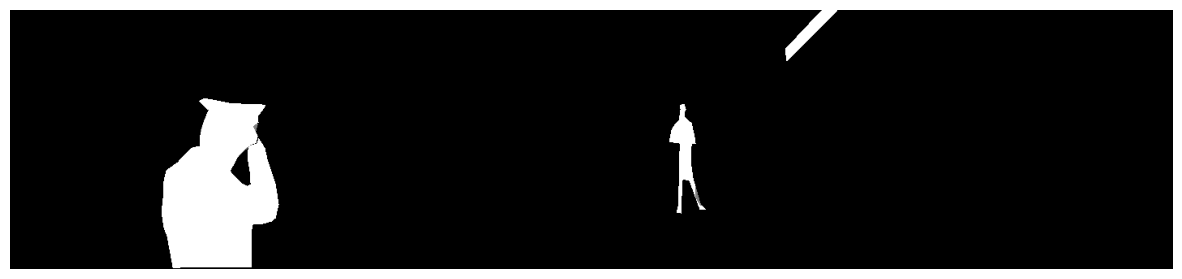

In [40]:
instances = [1, 2, 3]
images = []
for instance in instances:
    file_instance = '{}/instance_mask/{}/instance_{:03}_{}'.format(
        root_path, file_name.replace('.jpg', ''), instance, file_name.replace('.jpg', '.png'))
    aux = cv2.imread(file_instance)
    images.append(aux)
plt.figure(figsize=(5*len(images), 5))
plt.imshow(np.concatenate(images, 1))
plt.axis('off')

In [41]:
info['objects']

{'instancendx': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'class': ['person',
  'person',
  'person',
  'light troffer',
  'ceiling',
  'car',
  'wall',
  'floor',
  'light troffer',
  'light troffer',
  'light troffer',
  'light troffer',
  'light troffer',
  'light troffer',
  'light troffer'],
 'corrected_raw_name': ['person, individual, someone, somebody, mortal, soul',
  'person, individual, someone, somebody, mortal, soul',
  'person, individual, someone, somebody, mortal, soul',
  'light, light source',
  'ceiling',
  'car, auto, automobile, machine, motorcar',
  'wall',
  'floor, flooring',
  'light, light source',
  'light, light source',
  'light, light source',
  'light, light source',
  'light, light source',
  'light, light source',
  'light, light source'],
 'iscrop': array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'listattributes': [[],
  [],
  'standing',
  'on',
  [],
  [],
  [],
  [],
  'on',
  'on',
  'on',
  'on',
  'on',
  'on',
 

(-0.5, 477.5, 319.5, -0.5)

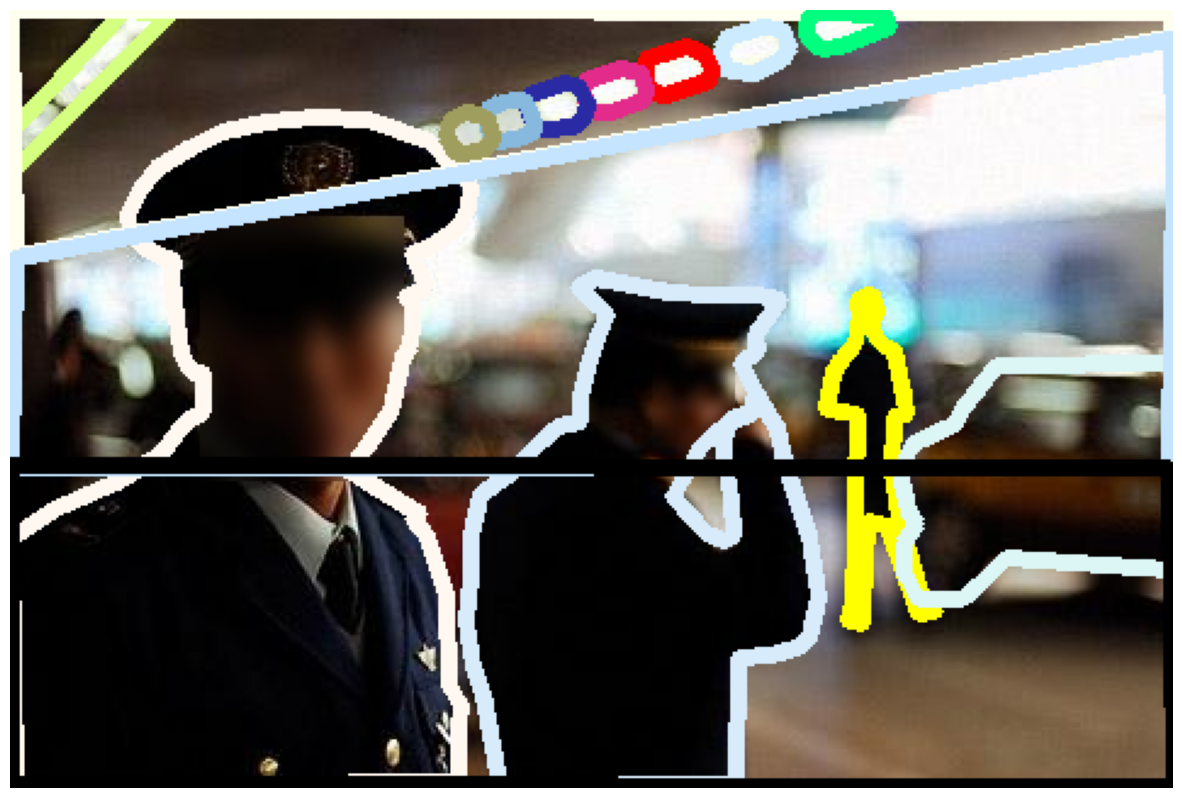

In [42]:
img = plot_polygon('{}/{}'.format(root_path, full_file_name), info)
plt.figure(figsize=(15,15))
plt.imshow(img[:, :, ::-1])
plt.axis('off')

# Object Detection

In [10]:
train = open('/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/ImageSets/Segmentation/train.txt').read().split('\n')
voc_train = train

In [11]:
test = open('/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/ImageSets/Segmentation/test.txt').read().split('\n')
voc_test = test

In [12]:
val = open('/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/ImageSets/Segmentation/val.txt').read().split('\n')
voc_val = val

In [13]:
train_img = []
train_class = []
train_object = []
test_img = []
test_class = []
test_object = []
val_img = []
val_class = []
val_object = []


for i in voc_train:
  train_img.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/JPEGImages/" + i + ".jpg")
  train_class.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/SegmentationClass" + i + ".png")
  train_object.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/SegmentationObject" + i + ".png")


for i in voc_test:
  test_img.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/JPEGImages/" + i + ".jpg")
  test_class.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/SegmentationClass" + i + ".png")
  test_object.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/SegmentationObject" + i + ".png")


for i in voc_val:
  val_img.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/JPEGImages/" + i + ".jpg")
  val_class.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/SegmentationClass" + i + ".png")
  val_object.append("/content/drive/MyDrive/DL/HW4/VOCdevkit/VOC2007/SegmentationObject" + i + ".png")

# Train 1

In [4]:
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 27.53 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [26]:
import sys
import os

py_file_location = "/content/Mask_RCNN"
sys.path.append(os.path.abspath(py_file_location))

In [34]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from Mask_RCNN.mrcnn import utils
from Mask_RCNN.mrcnn import visualize
from Mask_RCNN.mrcnn.visualize import display_images
import Mask_RCNN.mrcnn.model as modellib
from Mask_RCNN.mrcnn.model import log

%matplotlib inline

/content/Mask_RCNN/mrcnn/model.py:2359: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


In [35]:
from Mask_RCNN.samples.coco import coco
config = coco.CocoConfig()
COCO_DIR = "path to COCO dataset"

In [ ]:
if config.NAME == 'shapes':
    dataset = shapes.ShapesDataset()
    dataset.load_shapes(500, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
elif config.NAME == "coco":
    dataset = coco.CocoDataset()
    dataset.load_coco(COCO_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

# Train 2

In [ ]:
import tensorflow as tf
from tensorflow.python.training import moving_averages

fc_initializer = tf.keras.initializers.glorot_normal
conv2d_initializer = tf.keras.initializers.GlorotNormal

# create weight variable
def create_var(name, shape, initializer, trainable=True):
    return tf.compat.v1.get_variable(name, shape=shape, dtype=tf.float32,
                           initializer=initializer, trainable=trainable)

# conv2d layer
def conv2d(x, num_outputs, kernel_size, stride=1, scope="conv2d"):
    num_inputs = x.get_shape()[-1]
    with tf.compat.v1.variable_scope(scope):
        kernel = create_var("kernel", [kernel_size, kernel_size,
                                       num_inputs, num_outputs],
                            conv2d_initializer())
        return tf.nn.conv2d(x, kernel, strides=[1, stride, stride, 1],
                            padding="SAME")

# fully connected layer
def fc(x, num_outputs, scope="fc"):
    num_inputs = x.get_shape()[-1]
    with tf.compat.v1.variable_scope(scope):
        weight = create_var("weight", [num_inputs, num_outputs],
                            fc_initializer())
        bias = create_var("bias", [num_outputs,],
                          tf.zeros_initializer())
        return tf.compat.v1.nn.xw_plus_b(x, weight, bias)


# batch norm layer
def batch_norm(x, decay=0.999, epsilon=1e-03, is_training=True,
               scope="scope"):
    x_shape = x.get_shape()
    num_inputs = x_shape[-1]
    reduce_dims = list(range(len(x_shape) - 1))
    with tf.compat.v1.variable_scope(scope):
        beta = create_var("beta", [num_inputs,],
                               initializer=tf.zeros_initializer())
        gamma = create_var("gamma", [num_inputs,],
                                initializer=tf.ones_initializer())
        # for inference
        moving_mean = create_var("moving_mean", [num_inputs,],
                                 initializer=tf.zeros_initializer(),
                                 trainable=False)
        moving_variance = create_var("moving_variance", [num_inputs],
                                     initializer=tf.ones_initializer(),
                                     trainable=False)
    if is_training:
        mean, variance = tf.nn.moments(x, axes=reduce_dims)
        update_move_mean = moving_averages.assign_moving_average(moving_mean,
                                                mean, decay=decay)
        update_move_variance = moving_averages.assign_moving_average(moving_variance,
                                                variance, decay=decay)
        tf.compat.v1.add_to_collection(tf.compat.v1.GraphKeys.UPDATE_OPS, update_move_mean)
        tf.compat.v1.add_to_collection(tf.compat.v1.GraphKeys.UPDATE_OPS, update_move_variance)
    else:
        mean, variance = moving_mean, moving_variance
    return tf.nn.batch_normalization(x, mean, variance, beta, gamma, epsilon)


# avg pool layer
def avg_pool(x, pool_size, scope):
    with tf.compat.v1.variable_scope(scope):
        return tf.nn.avg_pool(x, [1, pool_size, pool_size, 1],
                strides=[1, pool_size, pool_size, 1], padding="VALID")

# max pool layer
def max_pool(x, pool_size, stride, scope):
    with tf.compat.v1.variable_scope(scope):
        return tf.nn.max_pool(x, [1, pool_size, pool_size, 1],
                              [1, stride, stride, 1], padding="SAME")

class ResNet50(object):
    def __init__(self, inputs, num_classes=1000, is_training=True,
                 scope="resnet50"):
        self.inputs =inputs
        self.is_training = is_training
        self.num_classes = num_classes

        with tf.compat.v1.variable_scope(scope):
            # construct the model
            net = conv2d(inputs, 64, 7, 2, scope="conv1") # -> [batch, 112, 112, 64]
            net = tf.nn.relu(batch_norm(net, is_training=self.is_training, scope="bn1"))
            net = max_pool(net, 3, 2, scope="maxpool1")  # -> [batch, 56, 56, 64]
            net = self._block(net, 256, 3, init_stride=1, is_training=self.is_training,
                              scope="block2")           # -> [batch, 56, 56, 256]
            net = self._block(net, 512, 4, is_training=self.is_training, scope="block3")
                                                        # -> [batch, 28, 28, 512]
            net = self._block(net, 1024, 6, is_training=self.is_training, scope="block4")
                                                        # -> [batch, 14, 14, 1024]
            net = self._block(net, 2048, 3, is_training=self.is_training, scope="block5")
                                                        # -> [batch, 7, 7, 2048]
            net = avg_pool(net, 7, scope="avgpool5")    # -> [batch, 1, 1, 2048]
            net = tf.squeeze(net, [1, 2], name="SpatialSqueeze") # -> [batch, 2048]
            self.logits = fc(net, self.num_classes, "fc6")       # -> [batch, num_classes]
            self.predictions = tf.nn.softmax(self.logits)


    def _block(self, x, n_out, n, init_stride=2, is_training=True, scope="block"):
        with tf.compat.v1.variable_scope(scope):
            h_out = n_out // 4
            out = self._bottleneck(x, h_out, n_out, stride=init_stride,
                                   is_training=is_training, scope="bottlencek1")
            for i in range(1, n):
                out = self._bottleneck(out, h_out, n_out, is_training=is_training,
                                       scope=("bottlencek%s" % (i + 1)))
            return out

    def _bottleneck(self, x, h_out, n_out, stride=None, is_training=True, scope="bottleneck"):
        """ A residual bottleneck unit"""
        n_in = x.get_shape()[-1]
        if stride is None:
            stride = 1 if n_in == n_out else 2

        with tf.compat.v1.variable_scope(scope):
            h = conv2d(x, h_out, 1, stride=stride, scope="conv_1")
            h = batch_norm(h, is_training=is_training, scope="bn_1")
            h = tf.nn.relu(h)
            h = conv2d(h, h_out, 3, stride=1, scope="conv_2")
            h = batch_norm(h, is_training=is_training, scope="bn_2")
            h = tf.nn.relu(h)
            h = conv2d(h, n_out, 1, stride=1, scope="conv_3")
            h = batch_norm(h, is_training=is_training, scope="bn_3")

            if n_in != n_out:
                shortcut = conv2d(x, n_out, 1, stride=stride, scope="conv_4")
                shortcut = batch_norm(shortcut, is_training=is_training, scope="bn_4")
            else:
                shortcut = x
            return tf.nn.relu(shortcut + h)

if __name__ == "__main__":
    x = tf.random.normal([32, 224, 224, 3])
    resnet50 = ResNet50(x)
    print(resnet50.logits)

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
from PIL import Image

from model import darknet
from detect_ops import decode
from utils import preprocess_image, postprocess, draw_detection
from config import anchors, class_names


input_size = (416, 416)
image_file = "./images/car.jpg"
image = cv2.imread(image_file)
image_shape = image.shape[:2]
image_cp = preprocess_image(image, input_size)
"""
image = Image.open(image_file)
image_cp = image.resize(input_size, Image.BICUBIC)
image_cp = np.array(image_cp, dtype=np.float32)/255.0
image_cp = np.expand_dims(image_cp, 0)
#print(image_cp)
"""


images = tf.placeholder(tf.float32, [1, input_size[0], input_size[1], 3])
detection_feat = darknet(images)
feat_sizes = input_size[0] // 32, input_size[1] // 32
detection_results = decode(detection_feat, feat_sizes, len(class_names), anchors)

checkpoint_path = "./checkpoint_dir/yolo2_coco.ckpt"
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    bboxes, obj_probs, class_probs = sess.run(detection_results, feed_dict={images: image_cp})

bboxes, scores, class_inds = postprocess(bboxes, obj_probs, class_probs,
                                         image_shape=image_shape)
img_detection = draw_detection(image, bboxes, scores, class_inds, class_names)
cv2.imwrite("detection.jpg", img_detection)
cv2.imshow("detection results", img_detection)

cv2.waitKey(0)